# Introduction

In this notebook, we will be testing the Burger's equation functionality.


In [1]:
import sys, os
solver_dir = r"C:\neuralOperator\solvers"
sys.path.append(solver_dir)
from solvers import *

import numpy as np
import matplotlib.pyplot as plt


solvers file:	c:\neuralOperator\solvers\solvers.py
Library directory:	C:\neuralOperator\solvers\lib
Before import from distributedFunctions
After import from distributedFunctions


# Burgers Equation Object

The advantage of how we have the problem set up is that each equation behaves as its own object. We can call the object directly, so we can see what is inside it.


In [2]:
x_domain = np.linspace( -1/2, 1/2, num=101 )
k = 100
u_0 = np.tanh( k * x_domain )

burgers_test = burgers_eqn()


Spatial order is 2
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


Our initial conditions are:


Text(0.5, 1.0, 'Initial conditions for test')

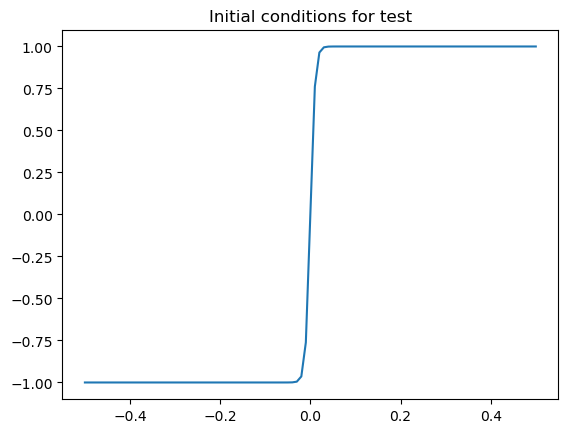

In [3]:
plt.plot( x_domain, u_0 )
plt.title("Initial conditions for test")


In [4]:
burgers_test( x_domain, u_0, 1 )


c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:188: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
c:\Users\User\.conda\envs\neuralOperator\lib\site-packages\scipy\sparse\_base.py:1068: SparseEfficiencyWarning: Constructing a DIA matrix with 103 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)


array([ 0.00000000e+00,  0.00000000e+00, -5.63211700e-11,  5.64561731e-11,
        5.63211700e-11, -5.64561731e-11,  0.00000000e+00, -5.63211700e-11,
        5.64561731e-11,  5.63211700e-11, -5.64561731e-11,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.63211700e-11,  5.64561731e-11,  5.63211700e-11, -1.12777343e-10,
        5.64561731e-11,  5.63211700e-11, -5.64561731e-11,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.63211700e-11,
        5.64561731e-11,  5.63211700e-11, -5.64561731e-11,  3.61666253e-12,
        2.71143108e-11,  1.86112459e-10,  1.33511335e-09,  1.03277102e-08,
        7.59486873e-08,  5.60731813e-07,  4.14367898e-06,  3.06178868e-05,
        2.26237222e-04,  1.67167979e-03,  1.23521240e-02,  9.12699140e-02,
        6.74364522e-01,  4.98106200e+00,  3.67043039e+01,  2.65793529e+02,
        1.70380980e+03,  5.56837359e+03,  0.00000000e+00, -5.56837359e+03,
       -1.70380980e+03, -

Note that this data is the time gradient that gets returned when we call the object.


So the gradient of our domain is:


In [5]:
burgers_test.dx


array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01])

And our 1st order gradient matrix is:


In [6]:
burgers_test.B.toarray()


array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ -50.,    0.,   50., ...,    0.,    0.,    0.],
       [   0.,  -50.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,   50.,    0.],
       [   0.,    0.,    0., ...,  -50.,    0.,   50.],
       [   0.,    0.,    0., ...,   50., -200.,  150.]])

And our 2nd order gradient matrix is:


In [7]:
burgers_test.A.toarray()


array([[     0.,      0.,      0., ...,      0.,      0.,      0.],
       [ 10000., -20000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -20000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -20000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -20000.,  10000.],
       [     0.,      0.,      0., ...,  10000., -20000.,  10000.]])

All that is well and good, but how big is it?


In [8]:
print(f"Burgers Equation object size:\t{sys.getsizeof(burgers_test):.3e} Bytes")


Burgers Equation object size:	4.800e+01 Bytes


All this looks good, so we can proceed with the time integration.
